# Bayesian Model Fitting

This practical tutorial is adapted from Prof. Jbabdi's [MATLAB practical](https://users.fmrib.ox.ac.uk/~saad/ONBI/bayes_practical.html)

## Problem statement: 

We have data from some measurement (e.g. temperature). We assume there is some true unknown value corresponding to this measurement and that our measurement decide is noisy. 

To approximate the true unknown value, we make several measurements and use Bayesian inference to determinine the most likely value of the true unknown value. 

We write the problem statement as a linear generative model:

$$y = a + \epsilon$$

$$\epsilon = \mathcal{N}(0,s^2)$$

Where, $y$ is the data, $a$ is a paramter of the model (the true unknown temperature) and $\epsilon$ is additive noise assumed to be given by Gaussian distribution with mean $0$ and standard deviation $s$. 



## Plot example Data and Likelihood

Here, we generate some sample data in the form of the above linear model. 
We then calcluate the Gaussian likelihood function. 
By plotting these, it should be clear that the data points are located around the center of the Gaussian likelihood. 


Using the generative model and the assumption of Gaussian noise, the likelihood function of the generative model is given by: 

$$P(y \mid a)= \mathcal{N}(a,s^2) $$


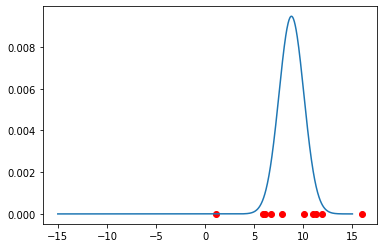

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

#Set Initial values for the mode
true_mean = 5
true_noise = 4
n = 10

# Generate Data from the model 
y = true_mean + true_noise * np.random.normal(0,1, n)


#define function to calculate gaussian likelihood
def calc_likelihood(y, ran, n, sd):
    N = len(ran)
    x = np.transpose(np.tile(y,(N,1)))
    mu = np.tile(ran,(n,1))
    numerator = np.sum(np.power(x - mu,2),0)
    denominator = np.power(sd,2)
    likelihood = np.exp(-0.5 * numerator / denominator)
    return likelihood

# Define range on which to calculate likelihood
ran = np.linspace(-15, 15, 1000)
N = len(ran)

#calculate likelihood and normalise

likelihood = calc_likelihood(y=y, ran=ran, n=n, sd=true_noise)

normalised_likelihood = likelihood / np.sum(likelihood)

# Plot likelihood and data 
plt.plot(ran,normalised_likelihood)
plt.scatter(y,np.zeros(n), color='r')
plt.show()


In [18]:
ran = np.linspace(-15, 15, 1000)
mu = np.tile(ran,(10,1))

mu

array([[-15.        , -14.96996997, -14.93993994, ...,  14.93993994,
         14.96996997,  15.        ],
       [-15.        , -14.96996997, -14.93993994, ...,  14.93993994,
         14.96996997,  15.        ],
       [-15.        , -14.96996997, -14.93993994, ...,  14.93993994,
         14.96996997,  15.        ],
       ...,
       [-15.        , -14.96996997, -14.93993994, ...,  14.93993994,
         14.96996997,  15.        ],
       [-15.        , -14.96996997, -14.93993994, ...,  14.93993994,
         14.96996997,  15.        ],
       [-15.        , -14.96996997, -14.93993994, ...,  14.93993994,
         14.96996997,  15.        ]])

In [17]:
    N = len(ran)
    x = np.transpose(np.tile(y,(N,1)))
    x

array([[10.05363997, 10.05363997, 10.05363997, ..., 10.05363997,
        10.05363997, 10.05363997],
       [10.96586832, 10.96586832, 10.96586832, ..., 10.96586832,
        10.96586832, 10.96586832],
       [15.99326056, 15.99326056, 15.99326056, ..., 15.99326056,
        15.99326056, 15.99326056],
       ...,
       [ 1.11909951,  1.11909951,  1.11909951, ...,  1.11909951,
         1.11909951,  1.11909951],
       [11.89453203, 11.89453203, 11.89453203, ..., 11.89453203,
        11.89453203, 11.89453203],
       [11.2616534 , 11.2616534 , 11.2616534 , ..., 11.2616534 ,
        11.2616534 , 11.2616534 ]])

### Prior

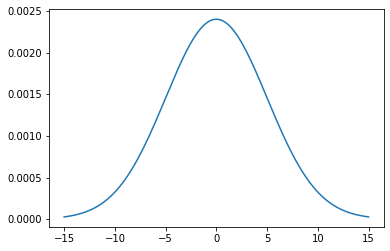

In [9]:
# Set Priors
data_prior = 0 
noise_prior = 5 
prior_dist = np.exp((-0.5 * np.power((ran - data_prior),2)) / np.power(noise_prior,2))
normalised_prior = prior_dist / np.sum(prior_dist)
plt.plot(ran,normalised_prior)
plt.show()

## Bayesian Linear Regression

Consider the following general linear model: 

$$\mathbf{y} = \mathbf{\beta x} + \epsilon $$ 

$$ \epsilon = \mathcal{N}(0,\sigma^{2}) $$

Where data $\mathbf{y}$ is generated from a linear combination of regression coefficients $\beta$ and regression variable or design matrix $\mathbf{x}$ plus Gaussian noise $\epsilon$. We can view this linear model as being a generative Gaussian process. 

$$ y = \mathcal{N}(\beta^{T}\mathbf{x}, \sigma^{2}\mathbf{I}) $$

Where, here, data $\mathbf{y}$ is generated from a Gaussian distribution with mean $\beta^{T}\mathbf{x}$ -- which, given that regressors $x$ are independent of each other, is a linear combination of the mean contributions of variables $x$ -- and variance $\sigma^{2}$, corresponding to the variance of the noise $\epsilon$, multiplied by the identity matrix, $\mathbf{I}$, to be consistent with matrix form. 

Using this Gaussian form, we can sample from the prior and posterior estimates of $\mathbf{\beta^{T}x}$ and $\sigma$.

This has been done for the linear model describing room temperature above. As you can see, the posterior estimates are much more precise than are the prior estimates. 

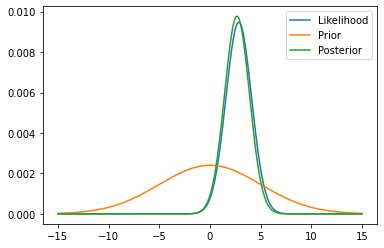

In [10]:
from scipy.stats import norm

beta = 1 / np.power(true_noise,2)
beta0 = 1 / np.power(noise_prior,2)

posterior_std = 1 / np.sqrt(n * beta + beta0)
posterior_mean = (n * beta * np.mean(y) + beta0 * data_prior) / (n * beta + beta0)

posterior_dist = norm.pdf(ran,posterior_mean,posterior_std)
normalised_posterior = posterior_dist / np.sum(posterior_dist)


plt.plot(ran,normalised_likelihood, label='Likelihood')
plt.plot(ran,normalised_prior, label='Prior')
plt.plot(ran,normalised_posterior, label='Posterior')
plt.legend()
plt.show()

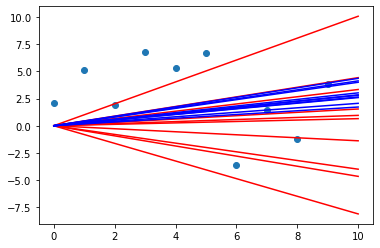

In [26]:
prior_sample = np.random.normal(data_prior,noise_prior,n)
prior_lines = np.array([prior_sample * data_prior,prior_sample * 1])

post_sample = np.random.normal(posterior_mean,posterior_std,n)
post_lines = np.array([post_sample * data_prior,post_sample * 1])

plt.scatter(range(n),y)
plt.plot([0,10],prior_lines, color='r')
plt.plot([0,10],post_lines, color='b')

plt.show()
